<a href="https://colab.research.google.com/github/macarenagrenetier/Entregas-Data-Science/blob/main/ProyectoDS_ParteI_Grenetier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚖 PROYECTO FINAL - ANÁLISIS DE DATOS - UBER 2024

###PRIMERA ENTREGA

### ▶ Introducción del proyecto

En este proyecto se utilizará un conjunto de datos de Uber obtenido de Kaggle, que recopila información detallada sobre las operaciones de viajes compartidos durante el año 2024. El dataset contiene un total de 148.770 registros de reservas, abarcando distintos tipos de vehículos y escenarios de servicio.

La base de datos ofrece una visión integral de la dinámica de la plataforma, incluyendo aspectos como:

*   Patrones de reserva y demanda.
*   Rendimiento de los vehículos.
*   Flujos de ingresos y métricas financieras.
*   Comportamientos de cancelación y satisfacción del cliente.


Gracias a este nivel de detalle, el dataset permite analizar tanto la eficiencia operativa de Uber como las tendencias en el comportamiento de los usuarios, brindando un recurso valioso para la exploración, modelado y generación de insights a través de técnicas de análisis de datos en Python.

### ▶ Hipótesis de Interés



1.  ¿Cómo varía la demanda de viajes según el día de la semana y el tipo de vehículo?
2.  ¿Cuál es la relación entre el ingreso generado y el tipo de vehículo?

3. ¿Cuál es la distribución del tiemo de los viajes?


### 💡 Objetivo del Proyecto

El objetivo de este proyecto es analizar el comportamiento de las operaciones de Uber durante el año 2024 a partir de un conjunto de datos que reúne más de 148.000 registros de viajes. A través de este análisis se busca identificar patrones de demanda según el día y el tipo de vehículo, evaluar la relación entre la distancia recorrida y los ingresos generados, y comprender el impacto de las cancelaciones en distintos periodos de tiempo. Estos resultados permitirán obtener un diagnóstico sobre el desempeño de la plataforma, brindando información valiosa para interpretar tendencias de uso, eficiencia operativa y comportamiento de los usuarios.

### 📈 Visualizaciones y Análisis

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://docs.google.com/spreadsheets/d/1LrWtUuBXQjeOUGh1UUgCvUfpm2t0ZwCj7KhFer78Mzk/export?format=csv&id=1LrWtUuBXQjeOUGh1UUgCvUfpm2t0ZwCj7KhFer78Mzk&gid=824440476"

df = pd.read_csv(url)

print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (150000, 22)


,Dia_de_la_semana,Fecha_de_la_reserva,Hora_de_la_reserva,Booking ID,Estado_de_la_reserva,Customer ID,Tipo_de_vehiculo,Lugar_de_inicio,Lugar_de_destino,Tiempo_promedio_en_min,...,Motivo_de_cancelación_del_cliente,Cancelación_por_el_conductor,Motivo_de_cancelación_del_conductor,Viaje_incompleto,Motivo_viaje_incompleto,Importe_tarifa,Distancia_recorrida_en_km,Calificacion_conductor,Calificacion_dada_por_el_cliente,Metodo_de_pago
0,sáb,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,vie,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,vie,2024-08-23,8:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,lun,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,lun,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


###Transformación de Datos

In [34]:
missing_counts = df.isnull().sum()
missing_pct = (df.isnull().mean() * 100).round(2)
pd.concat([missing_counts, missing_pct], axis=1, keys=['n_missing', 'pct_missing']).sort_values('pct_missing', ascending=False).head(20)

,n_missing,pct_missing
Viaje_incompleto,141000,94.0
Motivo_viaje_incompleto,141000,94.0
Cancelación_por_el_cliente,139500,93.0
Motivo_de_cancelación_del_cliente,139500,93.0
Motivo_de_cancelación_del_conductor,123000,82.0
Cancelación_por_el_conductor,123000,82.0
Calificacion_conductor,57000,38.0
Calificacion_dada_por_el_cliente,57000,38.0
Duracion_media,48000,32.0
Importe_tarifa,48000,32.0


In [35]:
df.info()
df.describe(include="all")

# 2. Identifico valores nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# 3. Tratamiento de nulos
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Reemplazo
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col] = df[col].fillna("Desconocido")

# 5. Conversión de tipos de datos
if "date" in df.columns or "fecha" in df.columns:
    df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")

# - Categorías
for col in cat_cols:
    df[col] = df[col].astype("category")

# 6. Detectar duplicados
print("Registros duplicados:", df.duplicated().sum())
df = df.drop_duplicates()

# 7. Confirmación final
print("Dimensiones finales del dataset:", df.shape)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Dia_de_la_semana                     150000 non-null  object 
 1   Fecha_de_la_reserva                  150000 non-null  object 
 2   Hora_de_la_reserva                   150000 non-null  object 
 3   Booking ID                           150000 non-null  object 
 4   Estado_de_la_reserva                 150000 non-null  object 
 5   Customer ID                          150000 non-null  object 
 6   Tipo_de_vehiculo                     150000 non-null  object 
 7   Lugar_de_inicio                      150000 non-null  object 
 8   Lugar_de_destino                     150000 non-null  object 
 9   Tiempo_promedio_en_min               139500 non-null  float64
 10  Duracion_media                       102000 non-null  float64
 11  Cancelación_p

,Dia_de_la_semana,Fecha_de_la_reserva,Hora_de_la_reserva,Booking ID,Estado_de_la_reserva,Customer ID,Tipo_de_vehiculo,Lugar_de_inicio,Lugar_de_destino,Tiempo_promedio_en_min,...,Motivo_de_cancelación_del_cliente,Cancelación_por_el_conductor,Motivo_de_cancelación_del_conductor,Viaje_incompleto,Motivo_viaje_incompleto,Importe_tarifa,Distancia_recorrida_en_km,Calificacion_conductor,Calificacion_dada_por_el_cliente,Metodo_de_pago
0,sáb,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.456352,...,Desconocido,1.0,Desconocido,1.0,Desconocido,508.295912,24.637012,4.230992,4.404584,Desconocido
1,vie,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.900000,...,Desconocido,1.0,Desconocido,1.0,Vehicle Breakdown,237.000000,5.730000,4.230992,4.404584,UPI
2,vie,2024-08-23,8:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.400000,...,Desconocido,1.0,Desconocido,1.0,Desconocido,627.000000,13.580000,4.900000,4.900000,Debit Card
3,lun,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.100000,...,Desconocido,1.0,Desconocido,1.0,Desconocido,416.000000,34.020000,4.600000,5.000000,UPI
4,lun,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.300000,...,Desconocido,1.0,Desconocido,1.0,Desconocido,737.000000,48.210000,4.100000,4.300000,UPI




1.  ¿Cómo varía la demanda de viajes según el día de la semana y el tipo de vehículo? - Análisis Multivariado



/tmp/ipython-input-214773416.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demanda = df.groupby(["dia_semana", "Tipo_de_vehiculo"]).size().reset_index(name="cantidad_viajes")


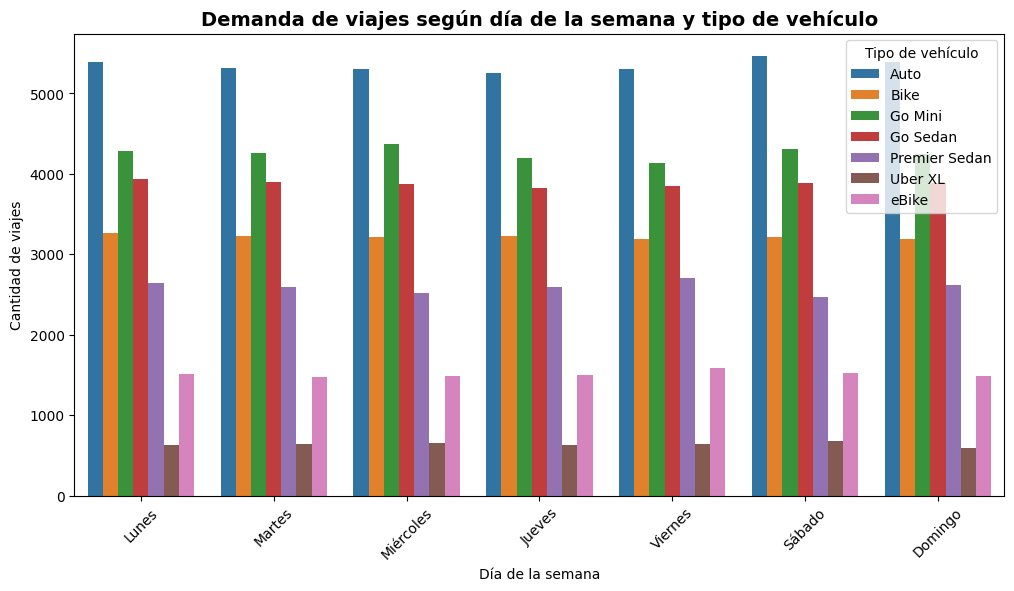

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://docs.google.com/spreadsheets/d/1LrWtUuBXQjeOUGh1UUgCvUfpm2t0ZwCj7KhFer78Mzk/export?format=csv&id=1LrWtUuBXQjeOUGh1UUgCvUfpm2t0ZwCj7KhFer78Mzk&gid=824440476"
df = pd.read_csv(url)

df["Fecha_de_la_reserva"] = pd.to_datetime(df["Fecha_de_la_reserva"], errors="coerce")


df["dia_semana"] = df["Fecha_de_la_reserva"].dt.day_name()


traductor_dias = {
    "Monday": "Lunes",
    "Tuesday": "Martes",
    "Wednesday": "Miércoles",
    "Thursday": "Jueves",
    "Friday": "Viernes",
    "Saturday": "Sábado",
    "Sunday": "Domingo"
}
df["dia_semana"] = df["dia_semana"].map(traductor_dias)


orden_dias = ["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"]
df["dia_semana"] = pd.Categorical(df["dia_semana"], categories=orden_dias, ordered=True)


demanda = df.groupby(["dia_semana", "Tipo_de_vehiculo"]).size().reset_index(name="cantidad_viajes")


plt.figure(figsize=(12,6))
sns.barplot(data=demanda, x="dia_semana", y="cantidad_viajes", hue="Tipo_de_vehiculo")

plt.title("Demanda de viajes según día de la semana y tipo de vehículo", fontsize=14, weight="bold")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de viajes")
plt.legend(title="Tipo de vehículo")
plt.xticks(rotation=45)
plt.show()


2.   ¿Cuál es la relación entre el ingreso generado y el tipo de vehículo? - Análisis Bivariado


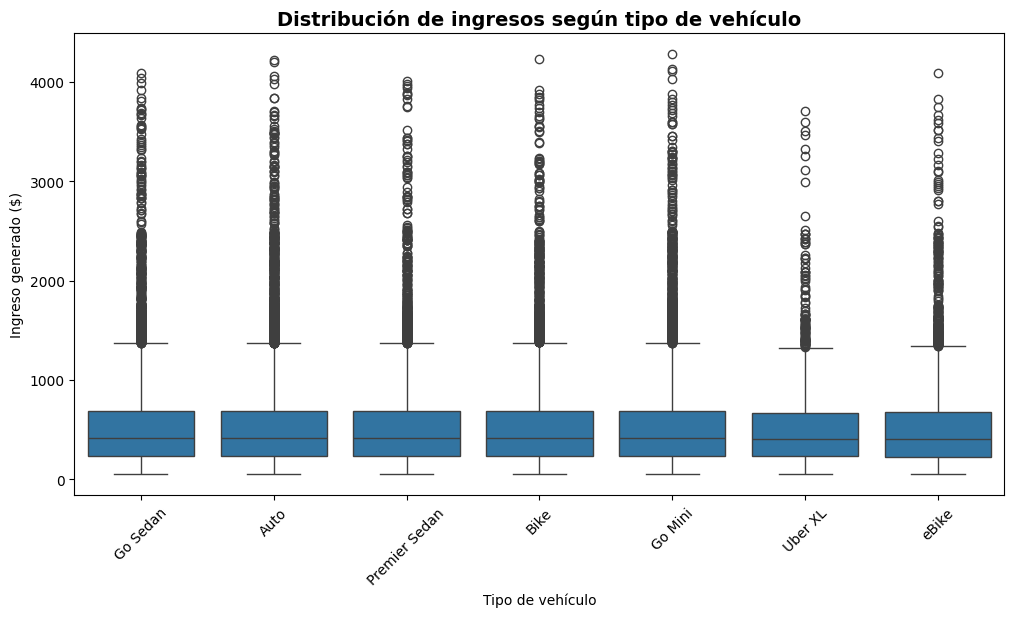

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['Importe_tarifa'] = pd.to_numeric(df['Importe_tarifa'], errors='coerce')


df_clean = df.dropna(subset=['Importe_tarifa', 'Tipo_de_vehiculo'])


plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_clean,
    x='Tipo_de_vehiculo',
    y='Importe_tarifa'
)
plt.title("Distribución de ingresos según tipo de vehículo", fontsize=14, weight='bold')
plt.xlabel("Tipo de vehículo")
plt.ylabel("Ingreso generado ($)")
plt.xticks(rotation=45)
plt.show()


3.   ¿Cuál es la distribución del tiempo de los viajes? - Análisis Univariado



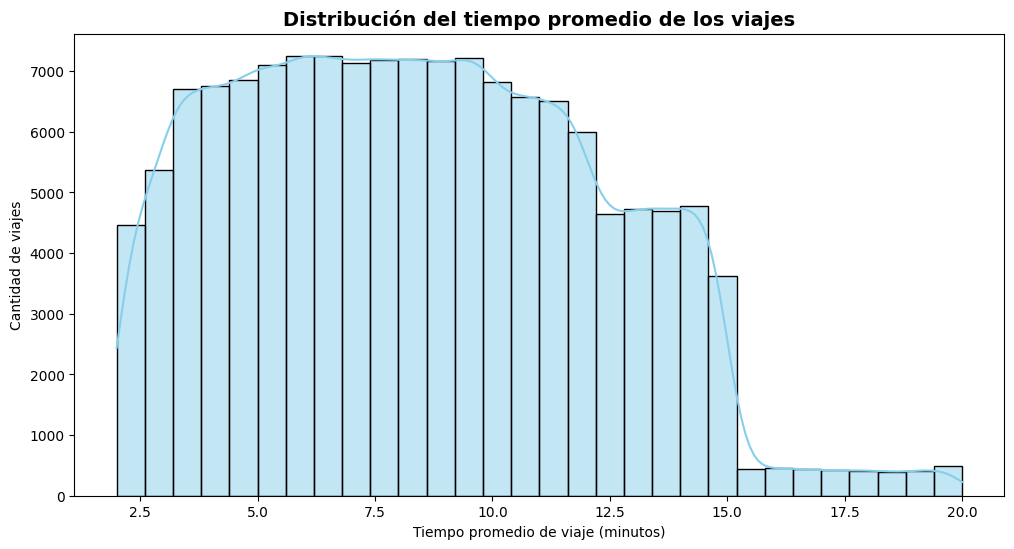

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://docs.google.com/spreadsheets/d/1LrWtUuBXQjeOUGh1UUgCvUfpm2t0ZwCj7KhFer78Mzk/export?format=csv&id=1LrWtUuBXQjeOUGh1UUgCvUfpm2t0ZwCj7KhFer78Mzk&gid=824440476"
df = pd.read_csv(url)

df['Tiempo_promedio_en_min'] = pd.to_numeric(df['Tiempo_promedio_en_min'], errors='coerce')


df_clean = df.dropna(subset=['Tiempo_promedio_en_min'])


plt.figure(figsize=(12,6))
sns.histplot(df_clean['Tiempo_promedio_en_min'], bins=30, kde=True, color='skyblue')
plt.title("Distribución del tiempo promedio de los viajes", fontsize=14, weight='bold')
plt.xlabel("Tiempo promedio de viaje (minutos)")
plt.ylabel("Cantidad de viajes")
plt.show()


### ☝ Conclusión del análisis de los 3 gráficos



*   La mayoría de los viajes son cortos (3-15 min) y la mayoría de los ingresos provienen de vehículos comunes (Autos, Go Mini, Sedan).

* Uber XL y eBike tienen muchos menos viajes, lo que indica menor popularidad o disponibilidad.

* Hay viajes largos y viajes de alto ingreso que son outliers, pero no predominan.

* La demanda es constante durante la semana, con Autos liderando claramente, aunque los sábados hay un ligero aumento en autos.

* Esto indica que la plataforma está enfocada en viajes frecuentes y cortos, con ingresos estables y concentrados en unos pocos tipos de vehículos.

